In [1]:
import numpy as np
from scipy.io import loadmat
from gcpds.visualizations.connectivities import CircosConnectivity
from ipywidgets import interact

In [9]:
channels = ['Fp1','Fpz','Fp2',
            'AF7','AF3','AFz','AF4','AF8',
            'F7','F5','F3','F1','Fz','F2','F4','F6','F8',
            'FT7','FC5','FC3','FC1','FCz','FC2','FC4','FC6','FT8',
            'T7','C5','C3','C1','Cz','C2','C4','C6','T8',
            'TP7','CP5','CP3','CP1','CPz','CP2','CP4','CP6','TP8',
            'P9','P7','P5','P3','P1','Pz','P2','P4','P6','P8','P10',
            'PO7','PO3','POz','PO4','PO8',
            'O1','Oz','O2',
            'Iz']

areas = {
    'Frontal': ['Fpz', 'AFz', 'Fz', 'FCz'],
    'Frontal Right': ['Fp2','AF4','AF8','F2','F4','F6','F8',],
    'Central Right': ['FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8',],
    'Posterior Right': ['P2','P4','P6','P8','P10','PO4','PO8','O2',],
    # 'Central': ['Cz'],
    'Posterior': ['CPz','Pz', 'Cz','POz','Oz','Iz',],
    'Posterior Left': ['P1','P3','P5','P7','P9','PO3','PO7','O1',],
    'Central Left': ['FC1','FC3','FC5','FT7','C1','C3','C5','T7','CP1','CP3','CP5','TP7',],
    'Frontal Left': ['Fp1','AF3','AF7','F1','F3','F5','F7',],
}

arcs = [
    # 'hemispheres',
    'areas',
    'channels',
]


In [10]:
N = 64
v = np.zeros((N, N), dtype=np.float64)
np.fill_diagonal(v, 1)

In [11]:
channels.index('C3'), channels.index('C4')

(28, 32)

In [12]:
v[28,32] = 0.9
v[32,28] = 0.9

In [13]:
v = v[np.triu_indices(63)].reshape(-1)
v.shape

(2016,)

In [14]:
v[v==1] = 0

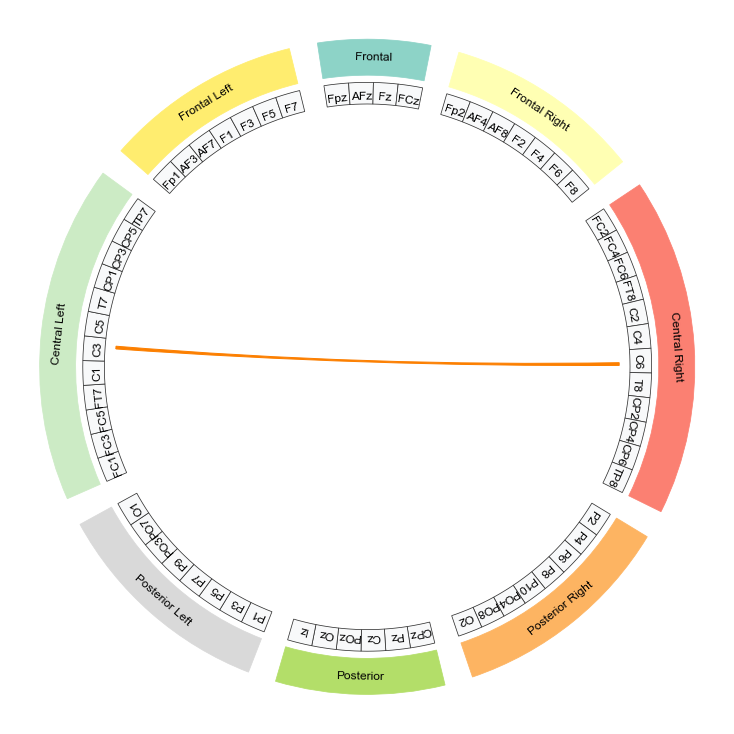

In [15]:
areas_cmap='Set3'
arcs_cmap='Wistia'
threshold=0.5

conn = CircosConnectivity(v, channels=channels, areas=areas, labelsize=12, arcs=arcs, min_alpha=0.1, threshold=threshold, 
                          areas_cmap=areas_cmap, arcs_cmap=arcs_cmap, size=10, 

                          # width=        {1:35, 2:100, 3:60}, 
                          # text=         {1:40, 2:20,  3:40}, 
                          # separation=   {1:10, 2:-30, 3:5}, 
                          # labelposition={1:60, 2:0,   3:-10},

                          width=        {1:100, 2:60}, 
                          text=         {1:20,  2:40}, 
                          separation=   {1:-30, 2:5}, 
                          labelposition={1:0,   2:-10}, 

                          arcs_separation=30,
                          hemisphere_color='lightgray', channel_color='#f8f9fa', connection_width=0.1,

                         small_separation=5, big_separation=5, offset=-1.5, remove_CZ=True,

                         )